# DX 704 Week 2 Project

This week's project will analyze fresh strawberry price data for a hypothetical "buy low, freeze, and sell high" business.
Strawberries show strong seasonality in their prices compared to other fruits.

![](https://ers.usda.gov/sites/default/files/_laserfiche/Charts/61401/oct14_finding_plattner_fig01.png)

Image source: https://www.ers.usda.gov/amber-waves/2014/october/seasonal-fresh-fruit-price-patterns-differ-across-commodities-the-case-of-strawberries-and-apples

You are considering a business where you buy strawberries when the prices are very low, carefully freeze them, even more carefully defrost them, and then sell them when the prices are high.
You will forecast strawberry price time series and then use them to tactically pick times to buy, freeze, and sell the strawberries.

The full project description, a template notebook, and raw data are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-02


### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Backtest Strawberry Prices

Read the provided "strawberry-prices.tsv" with data from 2000 through 2024.
This data is based on data from the U.S. Bureau of Statistics, but transformed so the ground truth is not online.
https://fred.stlouisfed.org/series/APU0000711415

Use the data for 2000 through 2023 to predict monthly prices in 2024.
Spend some time to make sure you are happy with your methodology and prediction accuracy, since you will reuse the methodology to forecast 2025 next.
Save the 2024 backtest predictions as "strawberry-backtest.tsv" with columns month and price.


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


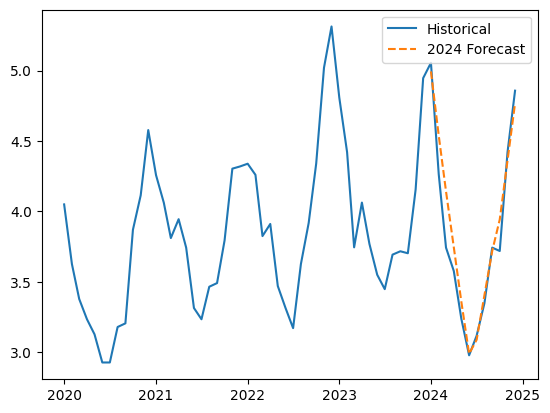

In [20]:
# YOUR CHANGES HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv('strawberry-prices.tsv', sep='\t')
df['month'] = pd.to_datetime(df['month'])
df = df.sort_values('month')
df.set_index('month', inplace=True)

#df['price'].plot(title="Strawberry Prices (2000–2023)", figsize=(10, 4))

train_data = df.loc[:'2023-12']
y = df['price']

model = AutoReg(y, lags=12)
fit = model.fit()
forecast = fit.predict(start=len(y), end=len(y)+11)

forecast_index = pd.date_range(start='2024-01-01', periods=12, freq='MS')
forecast_df = pd.DataFrame({
    'month': forecast_index.strftime('%Y-%m'),
    'price': forecast.values
})

forecast_df.to_csv("strawberry-backtest.tsv", sep='\t', index=False)

plt.plot(y, label='Historical')
plt.plot(forecast_index, forecast, label='2024 Forecast', linestyle='--')
plt.legend()
plt.show()


Submit "strawberry-backtest.tsv" in Gradescope.

## Part 2: Backtest Errors

What are the mean and standard deviation of the residuals between your backtest predictions and the ground truth? (If your mean is not close to zero, then you may be missing a long term trend.)

Write the mean and standard deviation to a file "backtest-accuracy.tsv" with two columns, mean and std.

In [24]:
# YOUR CHANGES HERE

# backtest predictions
predictions = pd.read_csv('strawberry-backtest.tsv', sep='\t')
predictions['month'] = pd.to_datetime(predictions['month'])

# ground truth 
ground_truth = pd.read_csv('strawberry-prices.tsv', sep='\t')
ground_truth['month'] = pd.to_datetime(ground_truth['month'])
ground_truth_df = ground_truth[(ground_truth['month'] >= '2024-01-01') & (ground_truth['month'] <= '2024-12-31')]

#combine backtest predictions and ground truth into 1 df 
merged_df = pd.merge(ground_truth_df, predictions, on='month', suffixes=('_actual', '_predicted'))

#calculate residuals between actual and predicted
merged_df['residual'] = merged_df['price_actual'] - merged_df['price_predicted']

#calculate mean and std
residual_mean = merged_df['residual'].mean()
residual_std = merged_df['residual'].std()

accuracy_df = pd.DataFrame({
    'mean': [residual_mean],
    'std': [residual_std]
})

accuracy_df.to_csv("backtest-accuracy.tsv", sep='\t', index=False)

accuracy_df

,mean,std
0,-0.082714,0.155527


Submit "backtest-accuracy.tsv" in Gradescope.

## Part 3: Forecast Strawberry Prices

Use all the data from 2000 through 2024 to predict monthly prices in 2025 using the same methodology from part 1.
Make a monthly forecast for each month of 2025 and save it as "strawberry-forecast.tsv" with columns for month and price.

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


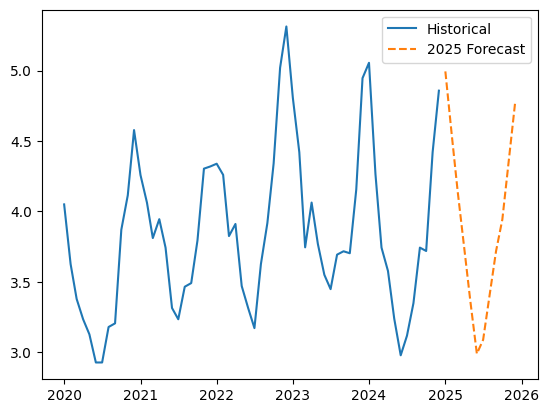

,month,price
0,2025-01,4.993810
1,2025-02,4.538183
2,2025-03,4.141835
3,2025-04,3.744858
4,2025-05,3.358379
5,2025-06,2.987705
6,2025-07,3.087276
7,2025-08,3.403849
8,2025-09,3.717755
9,2025-10,3.941382


In [56]:
# YOUR CHANGES HERE

df = pd.read_csv('strawberry-prices.tsv', sep='\t')
df['month'] = pd.to_datetime(df['month'])
df = df.sort_values('month')
df.set_index('month', inplace=True)

#df['price'].plot(title="Strawberry Prices (2000–2024)", figsize=(10, 4))

train_data = df.loc[:'2024-12']
y = df['price']

model = AutoReg(y, lags=12)
fit = model.fit()
forecast = fit.predict(start=len(y), end=len(y)+11)

forecast_index = pd.date_range(start='2025-01-01', periods=12, freq='MS')
forecast_df = pd.DataFrame({
    'month': forecast_index.strftime('%Y-%m'),
    'price': forecast.values
})

forecast_df.to_csv("strawberry-forecast.tsv", sep='\t', index=False)

plt.plot(y, label='Historical')
plt.plot(forecast_index, forecast, label='2025 Forecast', linestyle='--')
plt.legend()
plt.show()

forecast_df

Submit "strawberry-forecast.tsv" in Gradescope.

## Part 4: Buy Low, Freeze and Sell High

Using your 2025 forecast, analyze the profit picking different pairs of months to buy and sell strawberries.
Maximize your profit assuming that it costs &dollar;0.20 per pint to freeze the strawberries, &dollar;0.10 per pint per month to store the frozen strawberries and there is a 10% price discount from selling previously frozen strawberries.
So, if you buy a pint of strawberies for &dollar;1, freeze them, and sell them for &dollar;2 three months after buying them, then the profit is &dollar;2 * 0.9 - &dollar;1 - &dollar;0.20 - &dollar;0.10 * 3 = &dollar;0.30 per pint.
To evaluate a given pair of months, assume that you can invest &dollar;1,000,000 to cover all costs, and that you buy as many pints of strawberries as possible.

Write the results of your analysis to a file "timings.tsv" with columns for the buy_month, sell_month, pints_purchased, and expected_profit.

In [55]:
print(forecast_df.head(12))

               price
month               
2025-01-01  4.993810
2025-02-01  4.538183
2025-03-01  4.141835
2025-04-01  3.744858
2025-05-01  3.358379
2025-06-01  2.987705
2025-07-01  3.087276
2025-08-01  3.403849
2025-09-01  3.717755
2025-10-01  3.941382
2025-11-01  4.360928
2025-12-01  4.767606


In [ ]:
# YOUR CHANGES HERE

forecast_df['month'] = pd.to_datetime(forecast_df['month'])
forecast_df.set_index('month', inplace=True)

months = forecast_df.index.to_list()
prices = forecast_df['price'].to_dict()

freezing_cost = 0.2 
storage_cost_per_month = 0.10
price_drop_from_freezing = 0.9
total_budget = 1000000

results = []

for i, buy_month in enumerate(months[:-1]):
    buy_price = prices[buy_month]
    for sell_month in months[i+1:]:
        sell_price = prices[sell_month]
        months_stored = (pd.Period(sell_month, freq='M') - pd.Period(buy_month, freq='M')).n

        total_cost = buy_price + freezing_cost + storage_cost_per_month * months_stored
        final_sell_price = sell_price * price_drop_from_freezing

        # profit_per_pint = final_sell_price - total_cost
        profit_per_pint = (sell_price * 0.9) - buy_price - 0.20 - 0.10 * months_stored

        max_pints_possible = total_budget / total_cost
        total_profit_possible = profit_per_pint * max_pints_possible

        results.append({
                    'buy_month': buy_month.strftime('%Y-%m'),
                    'sell_month': sell_month.strftime('%Y-%m'),
                    'pints_purchased': int(max_pints_possible),
                    'expected_profit': round(total_profit_possible, 2)
                })
    
results_df = pd.DataFrame(results)
results_df.sort_values(by='expected_profit', ascending=False, inplace=True)
results_df.to_csv("timings.tsv", sep='\t', index=False)

results_df

,buy_month,sell_month,pints_purchased,expected_profit
55,2025-07,2025-12,264042,132963.47
50,2025-06,2025-12,264012,132835.30
59,2025-08,2025-12,249759,71680.23
54,2025-07,2025-11,271202,64426.61
49,2025-06,2025-11,271171,64302.93
...,...,...,...,...
15,2025-02,2025-07,190905,-469558.67
14,2025-02,2025-06,194621,-476676.02
6,2025-01,2025-08,169669,-480223.53
5,2025-01,2025-07,172597,-520428.11


Submit "timings.tsv" in Gradescope.

## Part 5: Strategy Check

What is the best profit scenario according to your previous timing analysis?
How much does that profit change if the sell price is off by one standard deviation from your backtest analysis?
(Variation in the sell price is more dangerous because you can see the buy price before fully committing.)

Write the results to a file "check.tsv" with columns best_profit and one_std_profit.

In [65]:
# YOUR CHANGES HERE

best_combination = results_df.iloc[0]

best_buy_month = best_combination['buy_month']
best_sell_month = best_combination['sell_month']
max_pints = best_combination['pints_purchased']
best_profit = best_combination['expected_profit']

forecast_df = pd.read_csv('strawberry-forecast.tsv', sep='\t')
forecast_df['month'] = pd.to_datetime(forecast_df['month'])
forecast_df.set_index('month', inplace=True)
buy_price = forecast_df.loc[pd.to_datetime(best_buy_month), 'price']
sell_price = forecast_df.loc[pd.to_datetime(best_sell_month), 'price']

#backtest analysis 
residual_stats = pd.read_csv("backtest-accuracy.tsv", sep='\t')
std = residual_stats['std'].iloc[0]

#calculate difference for 1 std 
months_stored = (pd.Period(best_sell_month, freq='M') - pd.Period(best_buy_month, freq='M')).n

adjusted_sell_price = sell_price - std
adjusted_final_sell_price = adjusted_sell_price * price_drop_from_freezing
adjusted_profit_per_pint = adjusted_final_sell_price - (buy_price + price_drop_from_freezing + storage_cost_per_month * months_stored)

one_std_profit = round(adjusted_profit_per_pint * max_pints, 2)

check_df = pd.DataFrame([{
    'best_profit': round(best_profit, 2),
    'one_std_profit': one_std_profit
}])

check_df.to_csv("check.tsv", sep='\t', index=False)

check_df


,best_profit,one_std_profit
0,132963.47,-88824.99


Submit "check.tsv" in Gradescope.

## Part 6: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgements.txt" in Gradescope.

## Part 7: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.